In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('boston_housing.csv')
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
list_numeric_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'LSTAT', 'MEDV']

In [8]:
def univariateAnalysis_numeric(column,bins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of CRIM
----------------------------------------------------------------------------
count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64 Distribution of CRIM
----------------------------------------------------------------------------


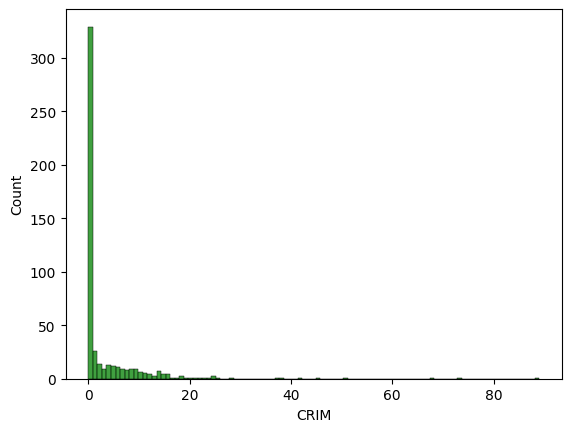

BoxPlot of CRIM
----------------------------------------------------------------------------


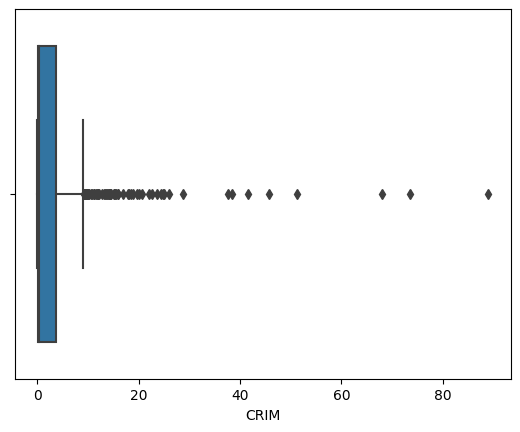

Description of ZN
----------------------------------------------------------------------------
count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64 Distribution of ZN
----------------------------------------------------------------------------


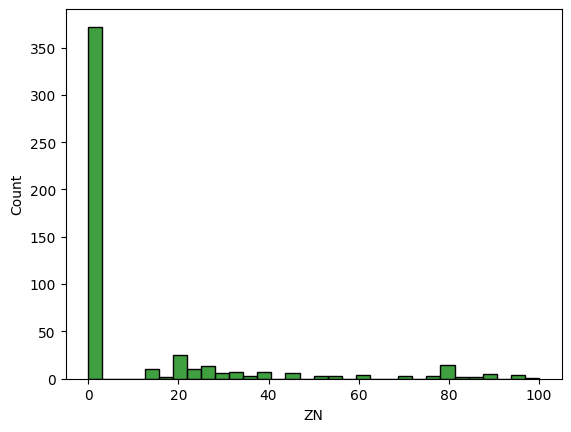

BoxPlot of ZN
----------------------------------------------------------------------------


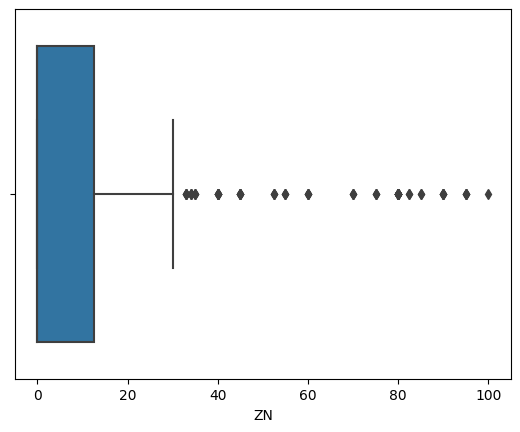

Description of INDUS
----------------------------------------------------------------------------
count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64 Distribution of INDUS
----------------------------------------------------------------------------


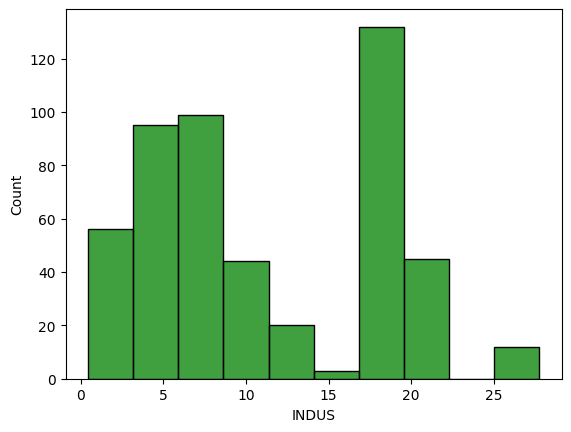

BoxPlot of INDUS
----------------------------------------------------------------------------


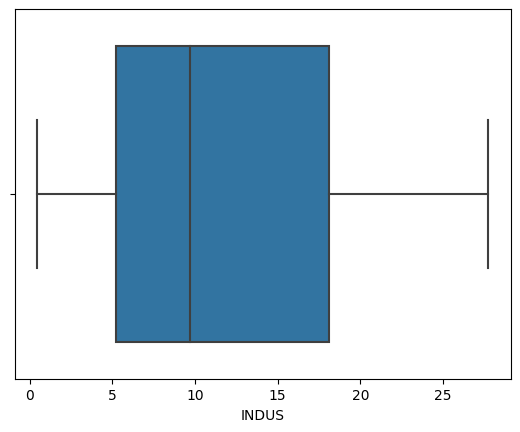

Description of CHAS
----------------------------------------------------------------------------
count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64 Distribution of CHAS
----------------------------------------------------------------------------


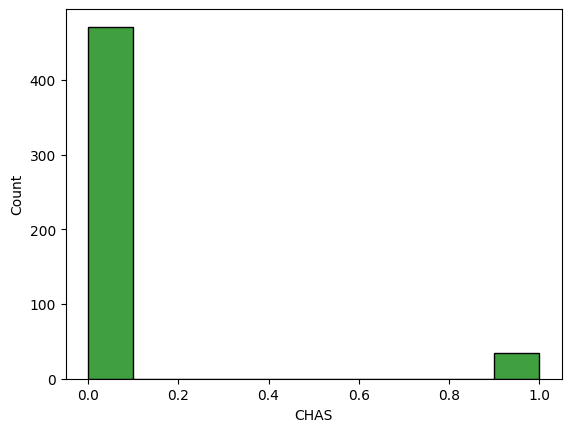

BoxPlot of CHAS
----------------------------------------------------------------------------


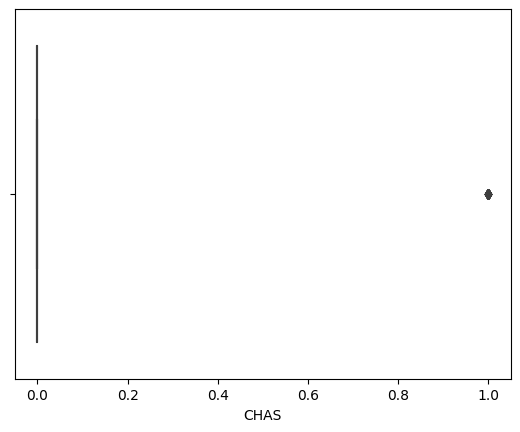

Description of NOX
----------------------------------------------------------------------------
count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64 Distribution of NOX
----------------------------------------------------------------------------


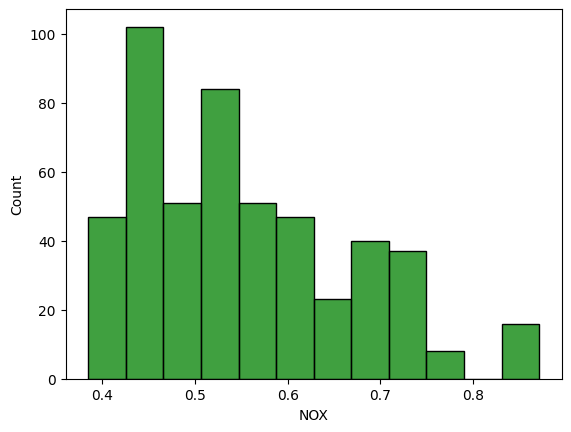

BoxPlot of NOX
----------------------------------------------------------------------------


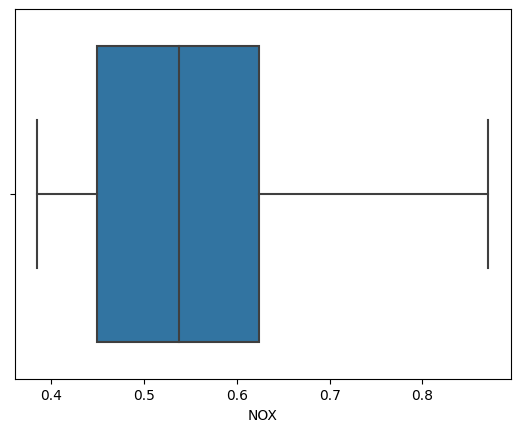

Description of RM
----------------------------------------------------------------------------
count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64 Distribution of RM
----------------------------------------------------------------------------


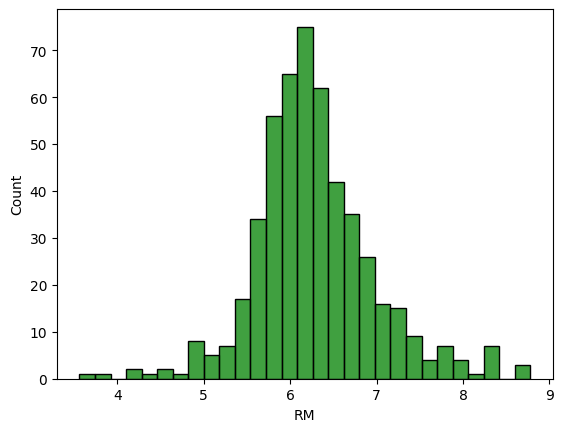

BoxPlot of RM
----------------------------------------------------------------------------


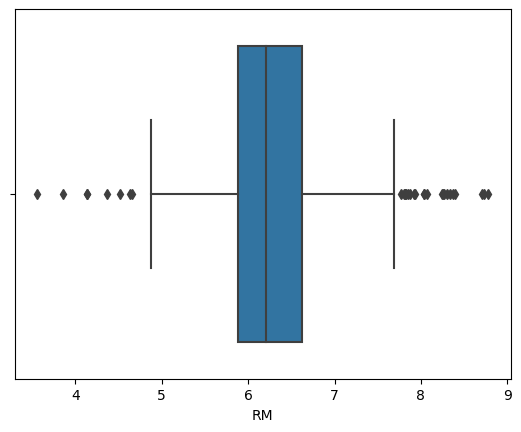

Description of AGE
----------------------------------------------------------------------------
count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64 Distribution of AGE
----------------------------------------------------------------------------


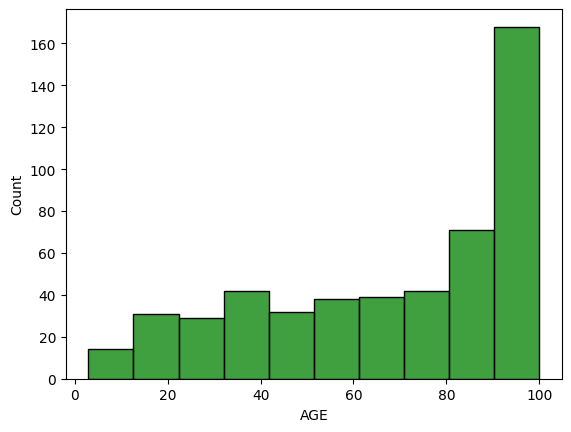

BoxPlot of AGE
----------------------------------------------------------------------------


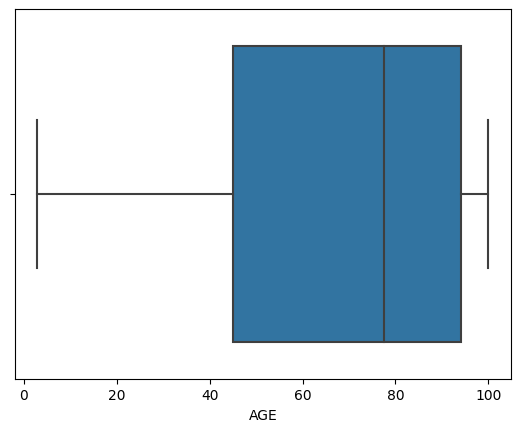

Description of DIS
----------------------------------------------------------------------------
count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64 Distribution of DIS
----------------------------------------------------------------------------


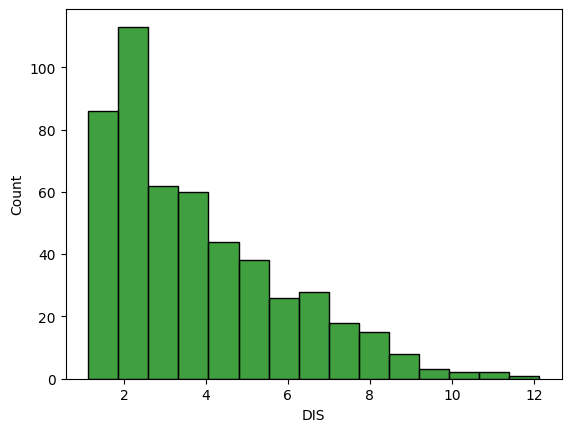

BoxPlot of DIS
----------------------------------------------------------------------------


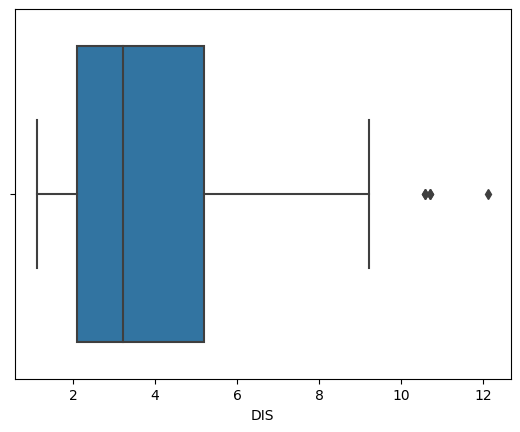

Description of RAD
----------------------------------------------------------------------------
count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64 Distribution of RAD
----------------------------------------------------------------------------


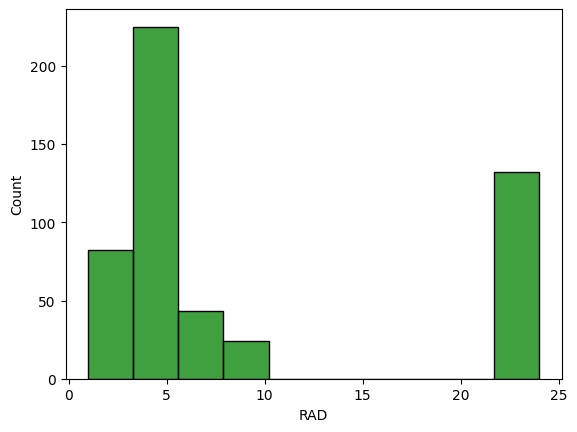

BoxPlot of RAD
----------------------------------------------------------------------------


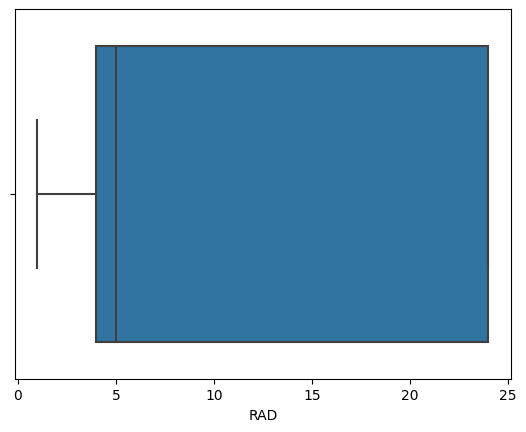

Description of TAX
----------------------------------------------------------------------------
count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64 Distribution of TAX
----------------------------------------------------------------------------


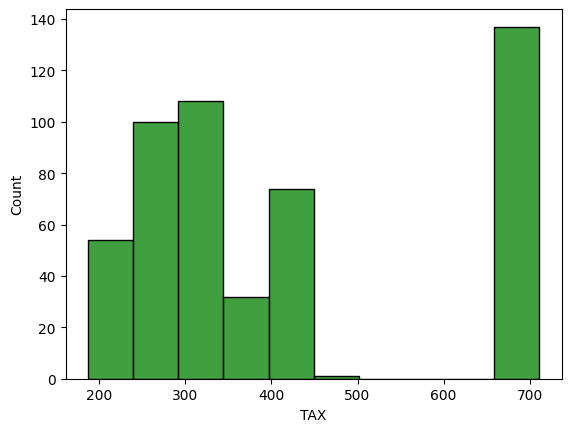

BoxPlot of TAX
----------------------------------------------------------------------------


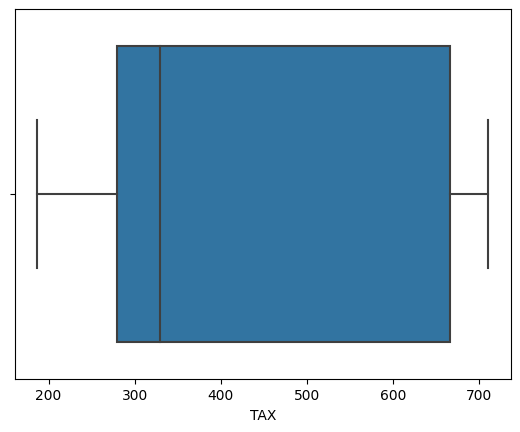

Description of PTRATIO
----------------------------------------------------------------------------
count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64 Distribution of PTRATIO
----------------------------------------------------------------------------


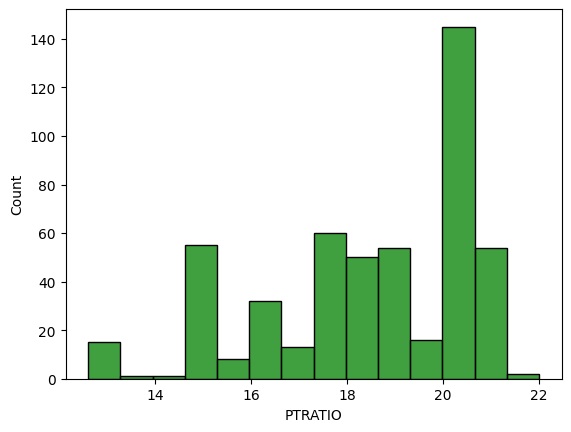

BoxPlot of PTRATIO
----------------------------------------------------------------------------


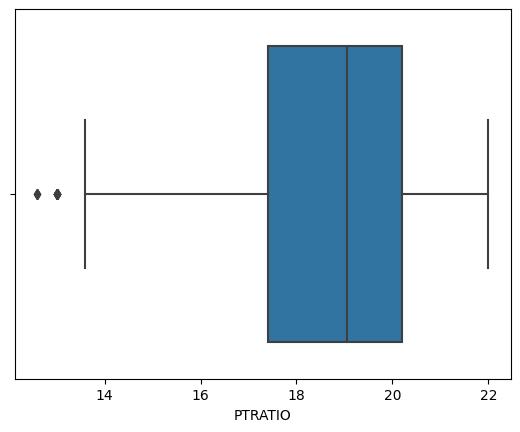

Description of LSTAT
----------------------------------------------------------------------------
count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64 Distribution of LSTAT
----------------------------------------------------------------------------


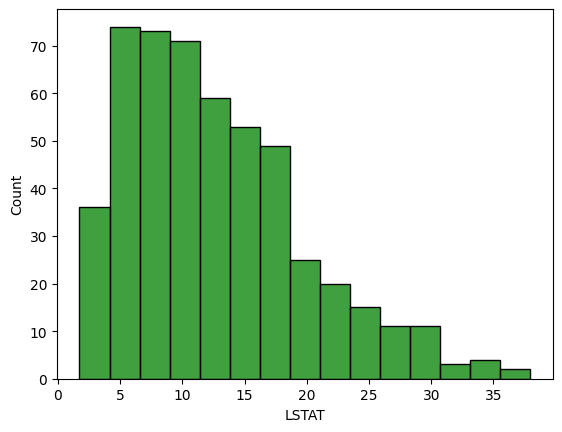

BoxPlot of LSTAT
----------------------------------------------------------------------------


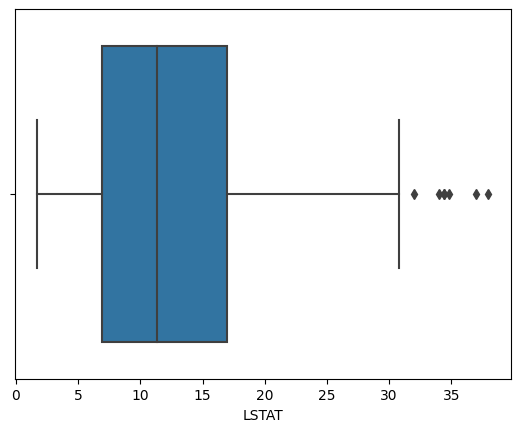

Description of MEDV
----------------------------------------------------------------------------
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64 Distribution of MEDV
----------------------------------------------------------------------------


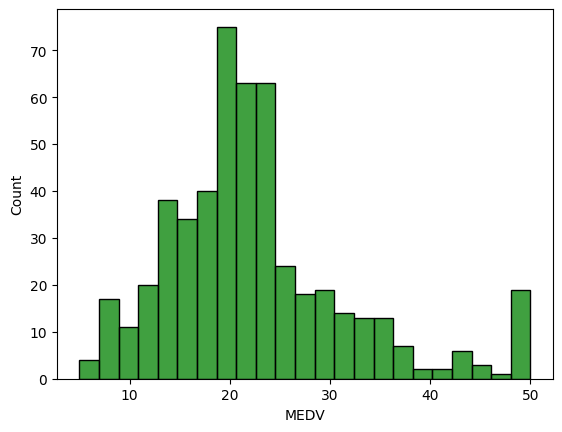

BoxPlot of MEDV
----------------------------------------------------------------------------


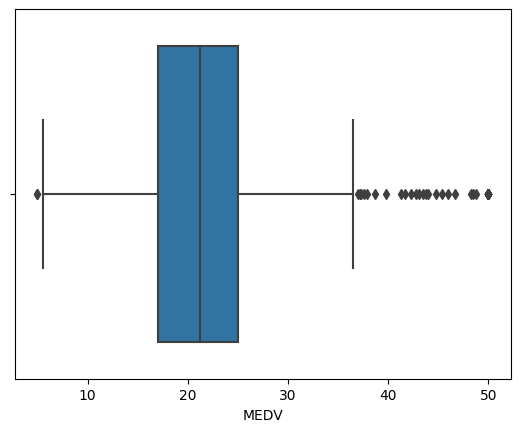

In [9]:
for v in list_numeric_columns:
    univariateAnalysis_numeric(v, 30)

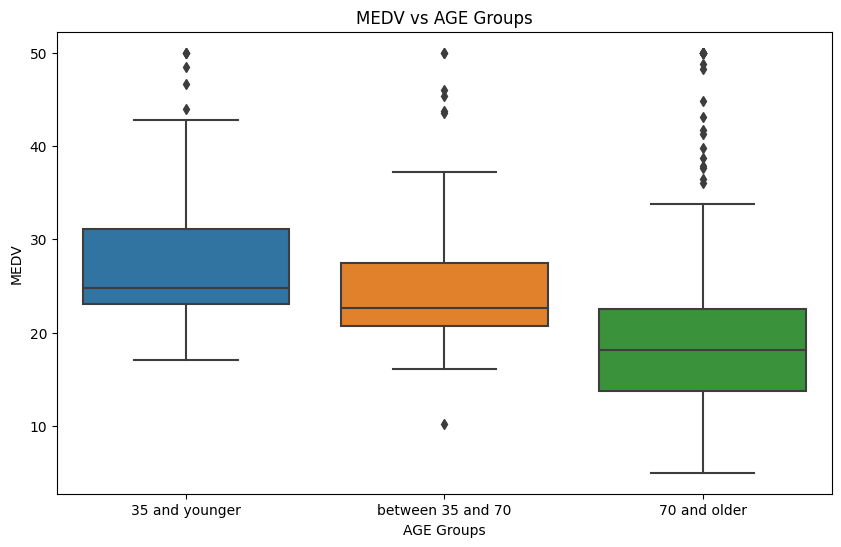

In [10]:
bins = [0, 35, 70, float('inf')]
labels = ['35 and younger', 'between 35 and 70', '70 and older']
df['AGE_Group'] = pd.cut(
    df['AGE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=df)
plt.title('MEDV vs AGE Groups')
plt.xlabel('AGE Groups')
plt.ylabel('MEDV')
plt.show()

In [11]:
from scipy.stats import ttest_ind
chas = df['CHAS']
chasdummies = pd.get_dummies(chas, dtype=int)
chasdummies
t_statistic, p_value = ttest_ind(chasdummies[1], chasdummies[0])
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

T-statistic: -53.96009489490948
P-value: 8.757522855106094e-300
Reject the null hypothesis: There is a significant difference between the groups.


In [12]:
f_statistic, p_value = stats.f_oneway(df['MEDV'], df['AGE'])

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

F-statistic: 1223.1740271875933
P-value: 3.20946197250671e-176
Reject the null hypothesis: There is a significant difference between the groups.


In [13]:
correlation_coef, p_value = stats.pearsonr(
    df['NOX'], df['INDUS'])
print(f'Pearson Correlation Coefficient: {correlation_coef}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between the variables.")

Pearson Correlation Coefficient: 0.7636514469209157
P-value: 7.91336106123623e-98
Reject the null hypothesis: There is a significant correlation between the variables.


In [14]:
X = df['DIS']
y = df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        17:37:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

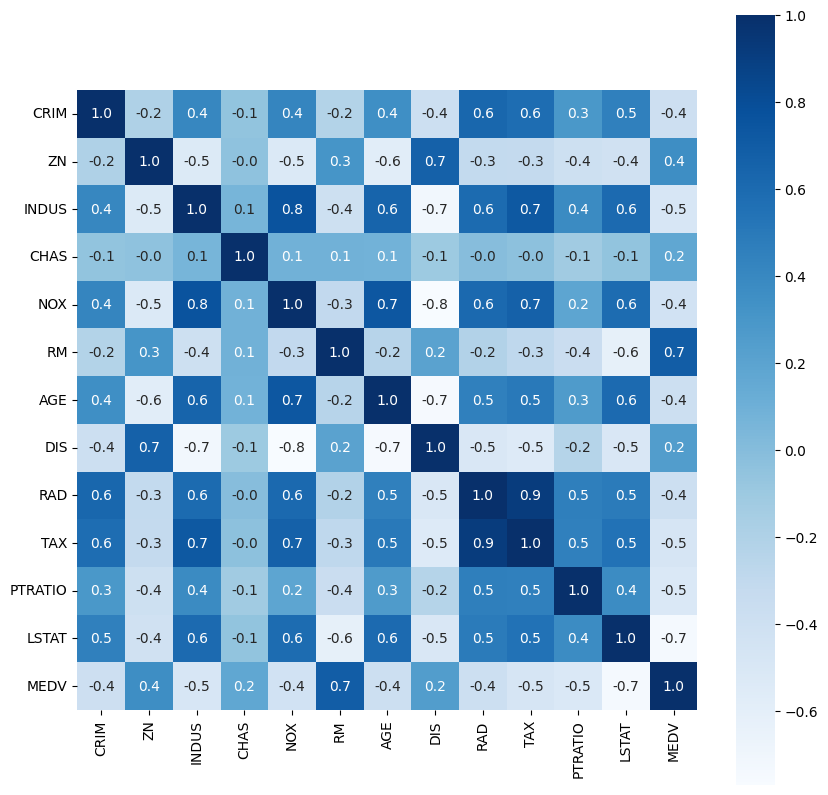

In [15]:
df_corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(df_corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')